## **Introduction: Billionaire Wealth Data Analysis**

Regardless of whether you think money is the root of all evil, it impacts each and every one of us every day. The chances of becoming extremely wealthy can depend on hard work, fortune, and luck. In this data analysis, I will assess patterns among a few thousand individuals who were fortunate enough to amass wealth capable of supporting generations. This analysis explores the **patterns in billionaire wealth** to identify potential factors that contribute to financial success, focusing on industry and country of origin.  
By analyzing the data, we aim to answer the following questions:  

1. What **industries** produce the most self-made billionaires?  
2. Do **certain countries** have more self-made vs. inherited billionaires?  


 
## **Dataset Overview**
This dataset, sourced from Kaggle, is owned by Nidula Elgiriyewithana. It contains information on the **top billionaires in the world in 2023**, including their **wealth, industries, country of origin, and whether they are self-made or inherited their wealth**.  

**Dataset Source**: [Billionaires Statistics Dataset - Kaggle](https://www.kaggle.com/datasets/nelgiriyewithana/billionaires-statistics-dataset)  

The dataset includes over 30 features. Some of the key features I will focus on are:

- **category**: The category or industry in which the billionaire's business operates.  
- **age**: The age of the billionaire.  
- **country**: The country in which the billionaire resides.  
- **industries**: The industries associated with the billionaire's business interests.  
- **countryOfCitizenship**: The country of citizenship of the billionaire.  
- **selfMade**: Indicates whether the billionaire is self-made (True) or inherited wealth (False).  
- **status**: "D" represents self-made billionaires (Founders/Entrepreneurs), while "U" indicates inherited or unearned wealth.  
- **gender**: The gender of the billionaire.  
- **cpi_country**: Consumer Price Index (CPI) for the billionaire's country.  
- **cpi_change_country**: CPI change for the billionaire's country.  
- **gross_tertiary_education_enrollment**: Enrollment in tertiary education in the billionaire's country.  
- **population_country**: Population of the billionaire's country.  


## **Importing the Data**
- First, we will import libraries necessary for working with our data, such as pandas and numpy.
- We will also import plotting libraries like seaborn and matplotlib.

In [358]:

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv("Billionaires Statistics Dataset.csv")

In [360]:
# Now I will look at the different columns, dtypes, and shape of dataframe
df.head()

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,67059887.0,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891


In [362]:
df.columns

Index(['rank', 'finalWorth', 'category', 'personName', 'age', 'country',
       'city', 'source', 'industries', 'countryOfCitizenship', 'organization',
       'selfMade', 'status', 'gender', 'birthDate', 'lastName', 'firstName',
       'title', 'date', 'state', 'residenceStateRegion', 'birthYear',
       'birthMonth', 'birthDay', 'cpi_country', 'cpi_change_country',
       'gdp_country', 'gross_tertiary_education_enrollment',
       'gross_primary_education_enrollment_country', 'life_expectancy_country',
       'tax_revenue_country_country', 'total_tax_rate_country',
       'population_country', 'latitude_country', 'longitude_country'],
      dtype='object')

In [364]:
df.shape

(2640, 35)

In [366]:
df.dtypes

rank                                            int64
finalWorth                                      int64
category                                       object
personName                                     object
age                                           float64
country                                        object
city                                           object
source                                         object
industries                                     object
countryOfCitizenship                           object
organization                                   object
selfMade                                         bool
status                                         object
gender                                         object
birthDate                                      object
lastName                                       object
firstName                                      object
title                                          object
date                        

## **Preprocessing the Data**
Before performing any analysis, we need to ensure the data is clean and usable. While the majority of the column titles are already cleaned, we will still follow some data cleaning steps to remove unnecessary data:

- Dropping columns that don’t provide valuable information
- Dealing with null values

In [369]:
# We can drop these columns because they are not useful for solving our 2 questions
df.drop(columns=[
    "rank", "personName", "firstName", "lastName", "birthDate", "birthYear", "birthMonth", "birthDay",
    "city", "state", "residenceStateRegion", "organization", "title", "date", "latitude_country", "longitude_country",
    "source", "finalWorth", "gdp_country", "tax_revenue_country_country", "total_tax_rate_country",
    "gross_primary_education_enrollment_country", "life_expectancy_country"
], inplace=True)

In [371]:
df.isnull().sum()

category                                 0
age                                     65
country                                 38
industries                               0
countryOfCitizenship                     0
selfMade                                 0
status                                   0
gender                                   0
cpi_country                            184
cpi_change_country                     184
gross_tertiary_education_enrollment    182
population_country                     164
dtype: int64

In [373]:
# Country is an important column for our questions and we need to their values. 
# We could try to fill our missing values with a median average but we want to accuratly display countries.
df.dropna(subset=["country"], inplace=True)

## **Data Understanding & Visualization**
To uncover trends in billionaire wealth, we will create **data visualizations**:

**Key Questions We Hope to Answer:**
1. What industries create the most **self-made** billionaires?  
2. Do **certain countries** produce more billionaires **(self-made vs inherited)** than others?

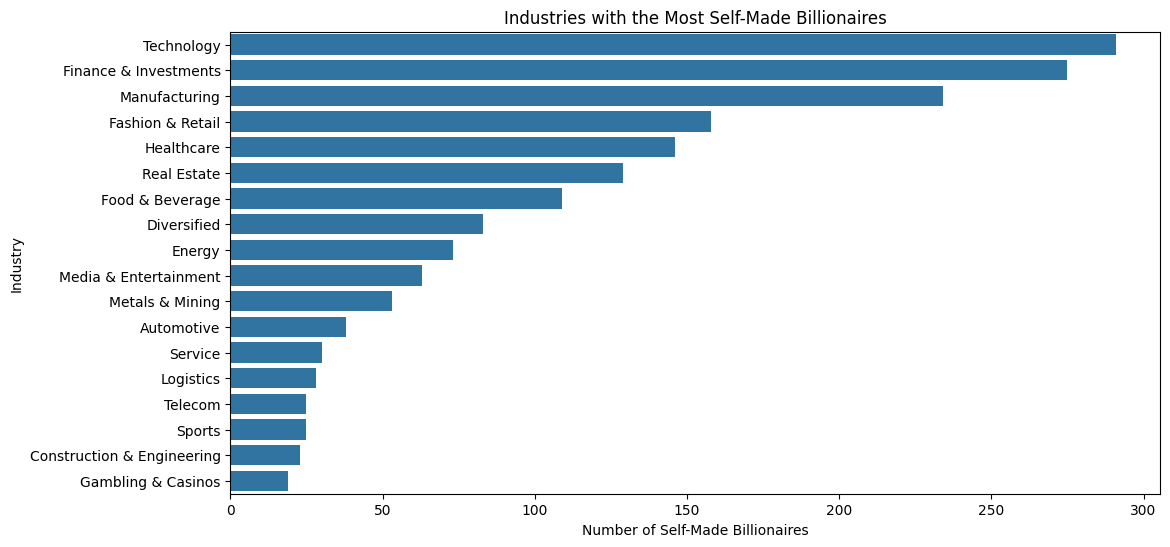

In [376]:
# Bar plot compares industries and their number of self-made billionaires
# Counting the number of self-made billionaires in each industry
industry_counts = df[df["selfMade"] == True]["category"].value_counts()

# X-axis: Number of self-made billionaires in each industry
# Y-axis: Industry categories
plt.figure(figsize=(12, 6))
sns.barplot(x=industry_counts.values, y=industry_counts.index)
plt.xlabel("Number of Self-Made Billionaires")
plt.ylabel("Industry")
plt.title("Industries with the Most Self-Made Billionaires")
plt.show()


This graph clearly shows that the most dominant industries, with over 150 billionaires, are Technology, Finance & Investments, and Manufacturing. On the other hand, industries like Service, Logistics, Telecom, Sports, Construction & Engineering, and Gambling & Casinos have significantly lower counts, with only about 25 to 40 billionaires in each industry. These findings confirm the stock market bias, as most stocks related to tech, finance, and manufacturing perform well in the S&P 500. Therefore, it’s expected that many CEOs or entrepreneurs are heavily invested in these related industries.

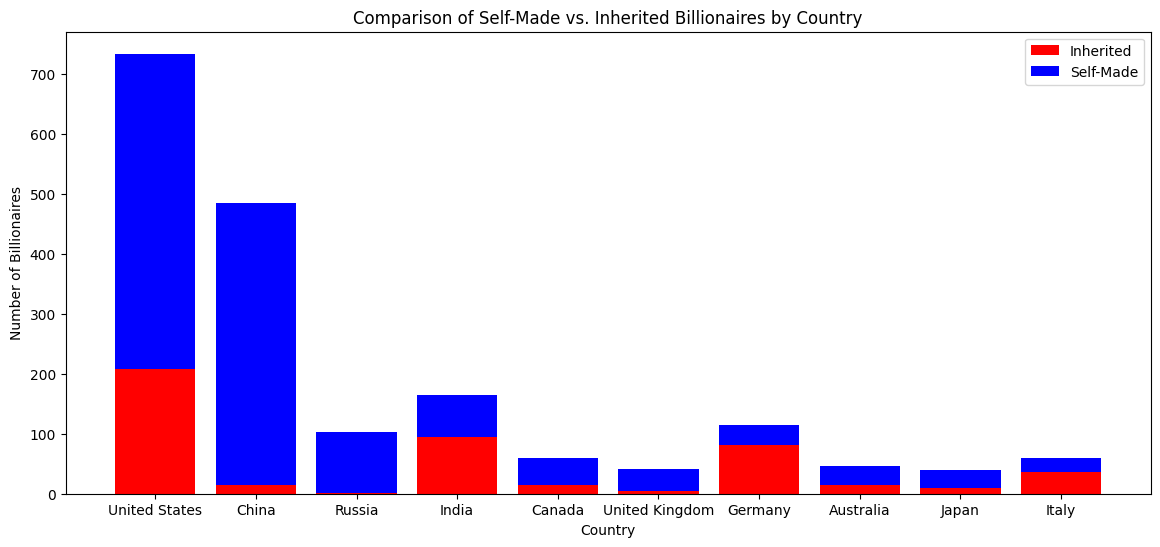

In [379]:
# This bar plot compares self-made vs. inherited wealth for the top 10 countries
# Most of the other countries had relatively low billionaire counts, So I focused on the top 10 which improves the bar plots fit.

# Finding top 10 countries by total number of billionaires
top_countries = country_counts.sum(axis=1).head(10)
top_country_counts = country_counts.loc[top_countries.index]

# Used y1 and y2 to stack both inherited and self-made billionares by country
x = top_country_counts.index
y1 = top_country_counts[False] 
y2 = top_country_counts[True] 
plt.figure(figsize=(14, 6))
plt.bar(x, y1, color='r')
plt.bar(x, y2, bottom=y1, color='b') 
# refrenced this site for help with stacking bar plots https://www.geeksforgeeks.org/create-a-stacked-bar-plot-in-matplotlib/

plt.xlabel("Country")
plt.ylabel("Number of Billionaires")
plt.title("Comparison of Self-Made vs. Inherited Billionaires by Country")
plt.legend(["Inherited", "Self-Made"])
plt.show()


Here we can see that the United States and China outperform most other countries, with around 70 and 500 billionaires. India, Germany, and Russia follow, but each has fewer than 200 billionaires.

## **Findings & Storytelling**

#### Industries with the Most Self-Made Billionaires
From an industry perspective, technology emerges as the leading sector for self-made billionaires, emphasizing its growing influence as AI becomes a major focus. Finance and investments follow closely, showcasing the wealth-generation potential in managing capital and private equity. Although AI could shift the distribution of billionaire industries even further in the future, it might also help other industries grow significantly once they figure out how to implement it effectively.

#### Comparison of Self-Made vs. Inherited Billionaires by Country
The U.S. has the highest number of self-made billionaires, showing a strong entrepreneurial culture and many opportunities for wealth creation. However, it also leads in inherited wealth, which makes sense given the significant generational wealth carried by a few prominent families. In contrast, most billionaires in China are self-made, highlighting the country's rapid economic growth and the opportunities for business in sectors like technology and manufacturing. Russia, although having fewer billionaires compared to the United States and China, still has a notable count of around 100, with very few inherited billionaires. This indicates that generational wealth is not as common in Russia.



## **Impact**
This analysis highlights global and industry wealth distribution, showcasing how sectors like technology, finance, and manufacturing drive wealth creation and inspire entrepreneurs. The positive impact of these findings and visualizations is that they can help investors, entrepreneurs, and companies identify industries more likely to generate wealth, aiding in financial decision-making. However, this study focuses on the top percentage of wealthy individuals in the world and may not provide much help for the average individual.

For the average person, this analysis can help identify industries they are passionate about and potentially pursue careers in, with the hope of climbing the ladder toward financial freedom. It also emphasizes how economic trends and entrepreneurial opportunities in certain countries and industries can influence individual success. 

## **Challenges**
This was a very fun dataset to work with, as it provided an opportunity to explore the differences in financial gain, whether someone inherited their wealth through heritage or built it by founding a company. It inspires future entrepreneurs like me to keep striving toward creating something impactful and meaningful. However, it was challenging to find a meaningful impact because most people wont touch anything close to a billion dollars due to wealth distribution inequality amongst the global population. 